#Exercise : Implement the codes for the Blog mentioned below. 
https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/

- Example code with random numbers

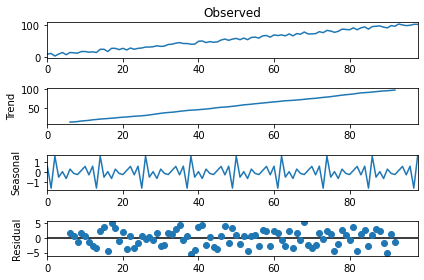

In [1]:
from random import randrange
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
# https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html
series = [i+randrange(10) for i in range(1,100)]
result = seasonal_decompose(series, period=12)
#result = seasonal_decompose(series,period=12)
result.plot()
pyplot.show()

In [4]:
result

In [44]:
len(series) # 100 elements

99

In [33]:
series[2:7] # See some numbers with range and confirm the series -- does not matter much its random numbers

[4, 7, 12, 9, 15]

In [45]:
isinstance(series, list) # Return type is a list

True

In [3]:
result
 #Decomposeresult is at https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.DecomposeResult.html#statsmodels.tsa.seasonal.DecomposeResult

In [35]:
result.seasonal

array([ 1.91443452,  1.515625  , -0.18080357, -0.71056548,  2.14657738,
       -1.84151786, -0.75967262,  0.19866071, -1.22842262, -0.68080357,
       -0.97842262,  0.60491071,  1.91443452,  1.515625  , -0.18080357,
       -0.71056548,  2.14657738, -1.84151786, -0.75967262,  0.19866071,
       -1.22842262, -0.68080357, -0.97842262,  0.60491071,  1.91443452,
        1.515625  , -0.18080357, -0.71056548,  2.14657738, -1.84151786,
       -0.75967262,  0.19866071, -1.22842262, -0.68080357, -0.97842262,
        0.60491071,  1.91443452,  1.515625  , -0.18080357, -0.71056548,
        2.14657738, -1.84151786, -0.75967262,  0.19866071, -1.22842262,
       -0.68080357, -0.97842262,  0.60491071,  1.91443452,  1.515625  ,
       -0.18080357, -0.71056548,  2.14657738, -1.84151786, -0.75967262,
        0.19866071, -1.22842262, -0.68080357, -0.97842262,  0.60491071,
        1.91443452,  1.515625  , -0.18080357, -0.71056548,  2.14657738,
       -1.84151786, -0.75967262,  0.19866071, -1.22842262, -0.68

In [38]:
result.weights # all have same priority

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [39]:
result.nobs # number of observation = number of elements we added in list

(99,)

- Example code with Multiplicative model

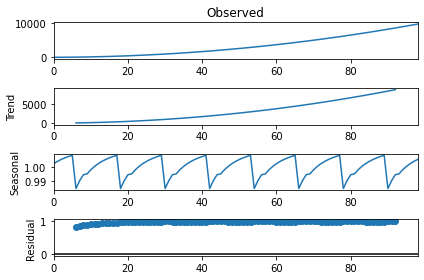

In [9]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
series = [i**2.0 for i in range(1,100)]
result = seasonal_decompose(series, model='multiplicative', period=12)
result.plot()
pyplot.show()

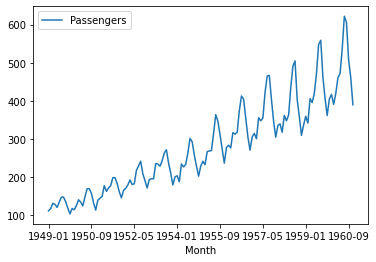

In [5]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv("airline-passengers1.csv", header=0, index_col=0)
series.plot()
pyplot.show()

In [6]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
series = read_csv('airline-passengers1.csv', header=0, index_col=0)
result = seasonal_decompose(series, model='multiplicative',period = 20)
result.plot()
pyplot.show() #  use this line to avoid duplicate outputs


- example with seed and data frame

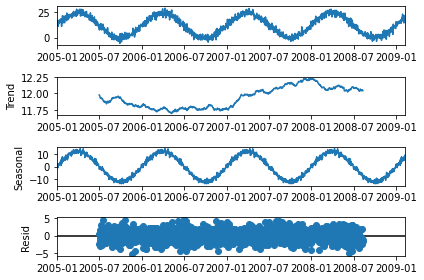

In [7]:
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

# Generate some data
np.random.seed(0)
n = 1500
dates = np.array('2005-01-01', dtype=np.datetime64) + np.arange(n)
data = 12*np.sin(2*np.pi*np.arange(n)/365) + np.random.normal(12, 2, 1500)
df = pd.DataFrame({'data': data}, index=dates)

# Reproduce the example in OP
#seasonal_decompose(df, model='additive', period=1).plot()
seasonal_decompose(df, model='additive', period=365).plot()
pyplot.show()

In [8]:
data

array([15.52810469, 13.00687469, 14.37053531, ..., 18.64313313,
       17.14303611, 19.23610988])

# Airline example using the dataframe option using csv file

In [9]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
 
#https://www.kaggle.com/rakannimer/air-passengers
df=pd.read_csv("airline.csv")
 
df.head()

Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121

In [10]:
df.shape

(144, 2)

In [11]:
df.isnull().values.any()

False

In [12]:
df.isnull().sum()

Month          0
#Passengers    0
dtype: int64

<AxesSubplot:xlabel='Month'>

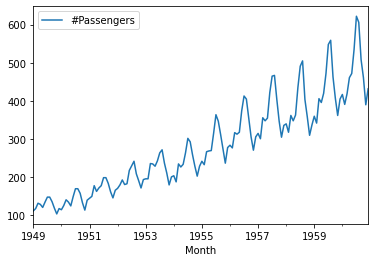

In [13]:
df.set_index('Month',inplace=True)
df.index=pd.to_datetime(df.index)
#drop null values
#df.dropna(inplace=True)
df.plot()

In [27]:
result=seasonal_decompose(df['#Passengers'], model='multiplicable', period=12)
#result=seasonal_decompose(df['#Passengers'], period=12)
#https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html
# model parameter is optional, put it via analysis. Impacts residuals a lot. This api needs observation
#https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.DecomposeResult.html#statsmodels.tsa.seasonal.DecomposeResult

<AxesSubplot:xlabel='Month'>

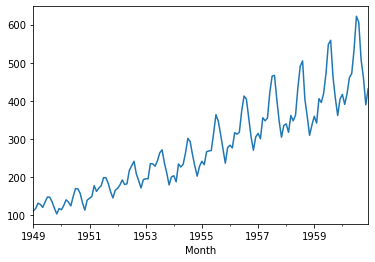

In [21]:
result.observed.plot()

<AxesSubplot:xlabel='Month'>

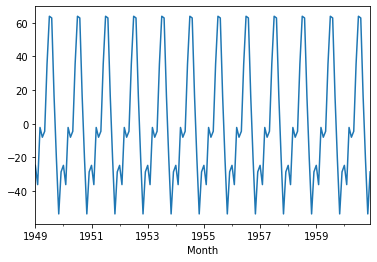

In [22]:
result.seasonal.plot()

<AxesSubplot:xlabel='Month'>

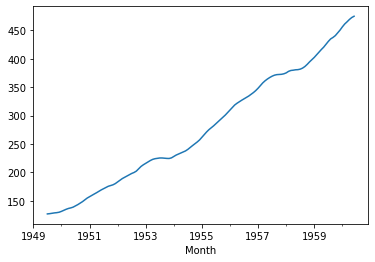

In [23]:
result.trend.plot()

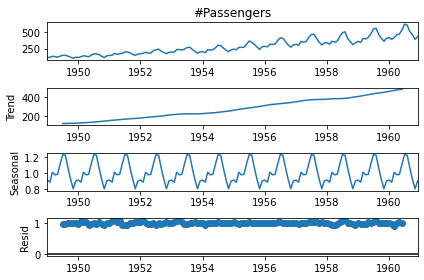

In [26]:
result.plot()
pyplot.show()